# Grow Intern Intership 
## Task 1

## Project Title :  Credit Card Fraud Detection

### Importing Libraries

In [350]:
import pandas as pd #for file reading
import matplotlib.pyplot as plt #for plots
import seaborn as sns # for plots 
from sklearn.preprocessing import LabelEncoder # for converting alphabetical categoriccal data to numeric codes
from sklearn.model_selection import train_test_split #for dividing data into training and testing data
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE #for balancing the imbalanced data set into equal set 
from sklearn.metrics import accuracy_score# for performance matrixes
from sklearn.datasets import make_classification # for classification report 


### Loading the  Dataset

In [267]:
data = pd.read_csv("fraudTest.csv")

In [246]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Columnns in dataset

In [13]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

### Statistical Analysis

In [16]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


### Null Values 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

### Shape of Dataset

In [22]:
data.shape

(555719, 23)

In [24]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Visualizations

# Fraud vs Non-Fraud Frequency Distribution

C:\Users\PMLS\AppData\Local\Temp\ipykernel_4932\3170516499.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['is_fraud'], sort = True)


Text(0, 0.5, 'Frequency')

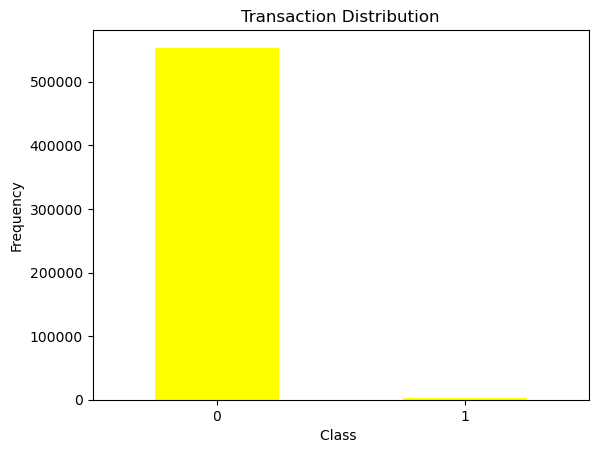

In [182]:
count_classes = pd.value_counts(data['is_fraud'], sort = True)
count_classes.plot(kind='bar', rot=0,color="yellow")
plt.title("Transaction Distribution")
plt.xlabel("Class ")
plt.ylabel("Frequency")

- 0 = Normal Transaction


- 1 =  fraudulent transaction

In [32]:
fraud = data[data['is_fraud']==1]
normal = data[data['is_fraud']==0]

In [34]:
print(fraud.shape, normal.shape)

(2145, 23) (553574, 23)


- Statistical analysis 

In [37]:
fraud.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2145.000000,2.145000e+03,2145.000000,2145.000000,2145.000000,2145.000000,2.145000e+03,2.145000e+03,2145.000000,2145.000000,2145.0
mean,242057.088112,3.854274e+17,528.356494,47862.900233,39.019971,-90.445556,6.452932e+04,1.379587e+09,39.018618,-90.465222,1.0
std,135455.280233,1.276313e+18,392.747594,26706.283776,5.076671,14.147521,2.192075e+05,4.546697e+06,5.093782,14.159252,0.0
min,1685.000000,6.048700e+10,1.780000,1257.000000,20.082700,-155.488000,2.300000e+01,1.371852e+09,19.161782,-156.480766,1.0
25%,131562.000000,3.056061e+13,214.510000,23937.000000,34.957200,-96.743000,1.131000e+03,1.375756e+09,35.017480,-96.697100,1.0
50%,245890.000000,2.358122e+15,371.940000,47987.000000,39.893600,-88.093500,2.870000e+03,1.379548e+09,39.744929,-88.040722,1.0
75%,346223.000000,4.335532e+15,907.770000,68031.000000,42.180800,-79.785600,1.233500e+04,1.383350e+09,42.208725,-79.909134,1.0
max,517571.000000,4.989848e+18,1320.920000,99921.000000,55.473200,-67.950300,1.577385e+06,1.387754e+09,56.214113,-66.960745,1.0


In [39]:
normal.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,553574.000000,5.535740e+05,553574.000000,553574.000000,553574.000000,553574.000000,5.535740e+05,5.535740e+05,553574.000000,553574.000000,553574.0
mean,277997.725990,4.179643e+17,67.614408,48846.424285,38.541406,-90.230495,8.831369e+04,1.380683e+09,38.540954,-90.230474,0.0
std,160496.162903,1.309964e+18,152.471931,26855.813540,5.061194,13.720111,3.006593e+05,5.203038e+06,5.095755,13.731399,0.0
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.0
25%,139011.250000,1.800429e+14,9.600000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376031e+09,34.754055,-96.906402,0.0
50%,278009.500000,3.521417e+15,47.150000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380770e+09,39.374616,-87.443645,0.0
75%,417073.750000,4.642255e+15,82.620000,72042.000000,41.894800,-80.175200,1.968500e+04,1.385872e+09,41.953397,-80.265911,0.0
max,555718.000000,4.992346e+18,22768.110000,99783.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,0.0


# Data Preprocessing

- Dropping columns

In [43]:
data.drop(columns=['Unnamed: 0','street','first','last','trans_num','unix_time'],inplace=True)

- Changing  the data type for 'trans_date_trans_time" : Creating new columns related to the date and time information from an existing column trans_date_trans_time.

In [46]:

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'],format='%Y-%m-%d %H:%M:%S') # convert the trans_date_trans_time Column to Datetime Format

data['hour'] = data['trans_date_trans_time'].dt.hour # extracting the hour from the trans_date_trans_time column

data['day'] = data['trans_date_trans_time'].dt.day_name() # extracting the day name from the trans_date_trans_time column

data['month'] = data['trans_date_trans_time'].dt.month  # extracting the month from the trans_date_trans_time column

- Removing the 'fraud_' from each merchant name

In [49]:
data['merchant'] = data['merchant'].apply(lambda x : x.replace('fraud_',''))
data[['merchant']].head()

,merchant
0,Kirlin and Sons
1,Sporer-Keebler
2,"Swaniawski, Nitzsche and Welch"
3,Haley Group
4,Johnston-Casper


- Calculating Age :Converting a date of birth column into an age column, and then removing the original date of birth column.


In [52]:
data['dob'] = pd.to_datetime(data['dob'],format='%Y-%m-%d')
data['age_cust'] = (data['trans_date_trans_time'].dt.year - data['dob'].dt.year).astype(int)
data.drop(columns='dob',inplace=True)

- Distance between customer's home and merchant : Now we will be calculating the absolute difference between latitude and longitude coordinates of two locations and rounds the result to two decimal places. Then assigning these calculated values to new columns named 'lat_dist' and 'long_dist'.

In [57]:
data['lat_dist'] = abs(round(data['merch_lat']-data['lat'],2))
data['long_dist'] = abs(round(data['merch_long']-data['long'],2))

#  Data as fraud and non fraud transaction 

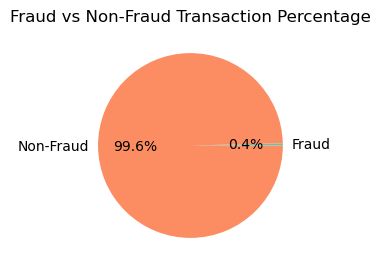

In [233]:

fraud_counts = data['is_fraud'].value_counts() # count of  Fraud ---> 1  and Non-Fraud--->

fraud_percentage = (fraud_counts[1] / len(data)) * 100  # calculating the  percentages
non_fraud_percentage = (fraud_counts[0] / len(data)) * 100

plt.figure(figsize=(3,3)) # making  the pie chart
plt.pie([fraud_percentage, non_fraud_percentage], labels=['Fraud', 'Non-Fraud'], autopct='%1.1f%%',colors=['#66c2a5','#fc8d62'])
plt.title('Fraud vs Non-Fraud Transaction Percentage')
plt.show()


# Gender Distribution based on  Fraud and non fraud detection 

In [63]:

normal = data[data['is_fraud'] == 0] # creating the normal transaction dataset

fraud = data[data['is_fraud'] == 1] # creating the  fruad transaction dataset

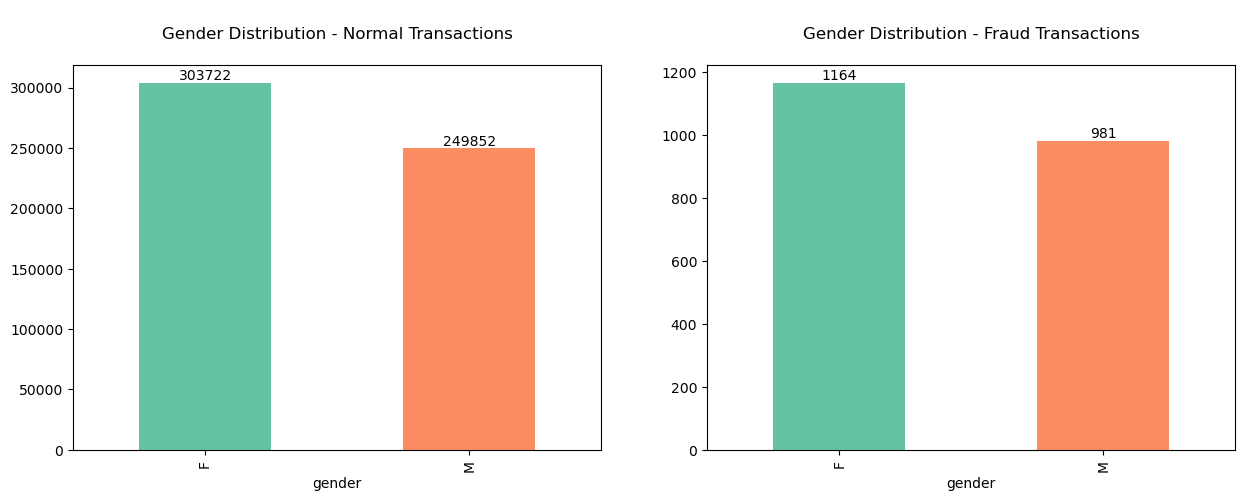

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[15, 5])

# Creating a color palette
colors = sns.color_palette("Set2")

plt.subplot(1, 2, 1)  # Creating a subplot
normal['gender'].value_counts().plot(kind='bar', color=colors)  # Plotting the counts of each gender category in 'gender'
plt.title('\nGender Distribution - Normal Transactions\n')

for i, value in enumerate(normal['gender'].value_counts()):  # Annotating the bars in the bar chart with their count values
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.subplot(1, 2, 2)  # Plotting gender count in fraud class
fraud['gender'].value_counts().plot(kind='bar', color=colors)  # Plotting the counts of each gender category in 'gender'
plt.title('\nGender Distribution - Fraud Transactions\n')

for i, value in enumerate(fraud['gender'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()


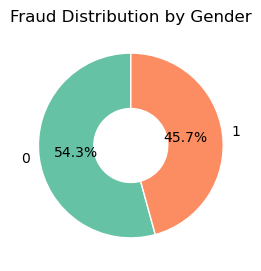

In [237]:

fraud_by_gender = data.groupby(['gender', 'is_fraud']).size().unstack() # countting the occurrences of fraud by gender

plt.figure(figsize=(3,3))

plt.pie(fraud_by_gender[1], labels=fraud_by_gender.index, autopct='%1.1f%%', startangle=90, # selecting the 'is_fraud' column and plotting the donut chart
        wedgeprops=dict(width=0.6, edgecolor='w'),colors=['#66c2a5','#fc8d62'])  # Set width for the donut effect

plt.title('Fraud Distribution by Gender')
plt.show()

# Top Columns

-  Accounts  with most Fradulent Transaction 

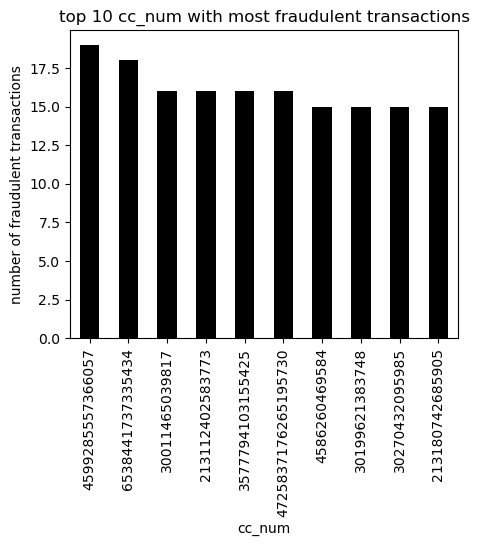

In [253]:
# grouping by credit card number (cc_num) and summing fraudulent transactions
fraud_count_merch = data.groupby("cc_num")["is_fraud"].sum()

# selecting the top 10 credit card numbers with the most fraudulent transactions
top10_merch = fraud_count_merch.nlargest(10)

# plotting
plt.figure(figsize=(5, 4))
top10_merch.plot(kind="bar", color='black')  # setting the color to violet
plt.xlabel("cc_num")
plt.ylabel("number of fraudulent transactions")
plt.title("top 10 cc_num with most fraudulent transactions")
plt.xticks(rotation=90)
plt.show()


- Merchants with Most Fradulent Transaction 

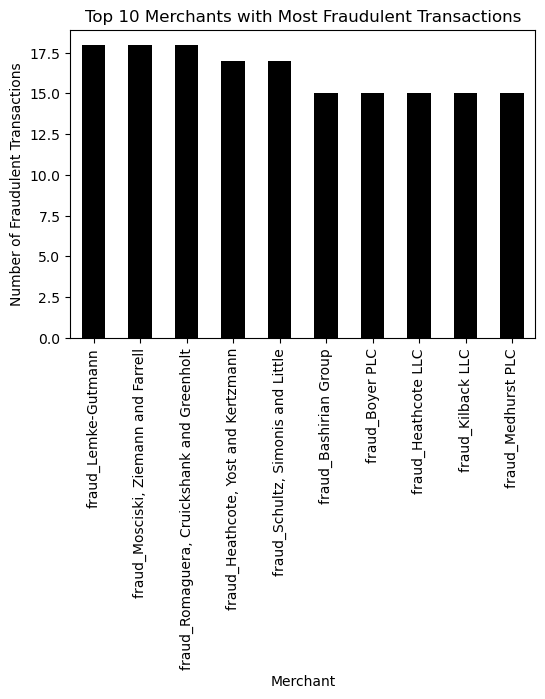

In [255]:
fraud_count_merch = data.groupby("merchant")["is_fraud"].sum()
top10_merch = fraud_count_merch.nlargest(10)
plt.figure(figsize=(6,4))
top10_merch.plot(kind="bar",color='black')
plt.xlabel("Merchant")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Merchants with Most Fraudulent Transactions")
plt.xticks(rotation=90)
plt.show()

-  Categories with Most Fradulent Transactions 

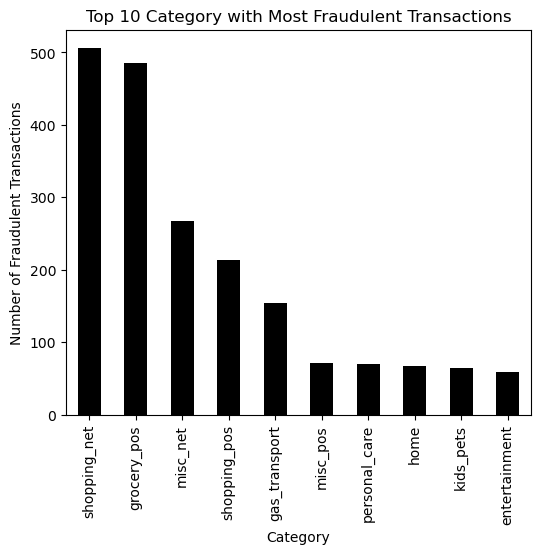

In [257]:
fraud_counts_cat = data.groupby("category")["is_fraud"].sum()
top10_cat = fraud_counts_cat.nlargest(10)
plt.figure(figsize=(6,5))
top10_cat.plot(kind="bar",color='black')
plt.xlabel("Category")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Category with Most Fraudulent Transactions")
plt.xticks(rotation=90)
plt.show()

-  Cities with Most Fradulent Transactions 

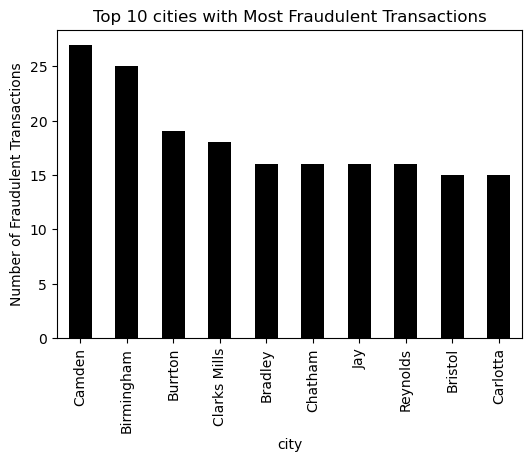

In [261]:
fraud_counts_city = data.groupby("city")["is_fraud"].sum()
plt.figure(figsize=(6,4))
fraud_counts_city.nlargest(10).plot(kind="bar",color='black')
plt.xlabel("city")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 cities with Most Fraudulent Transactions")
plt.xticks(rotation=90)
plt.show()

- Jobs with Most Fradulent Transactions 

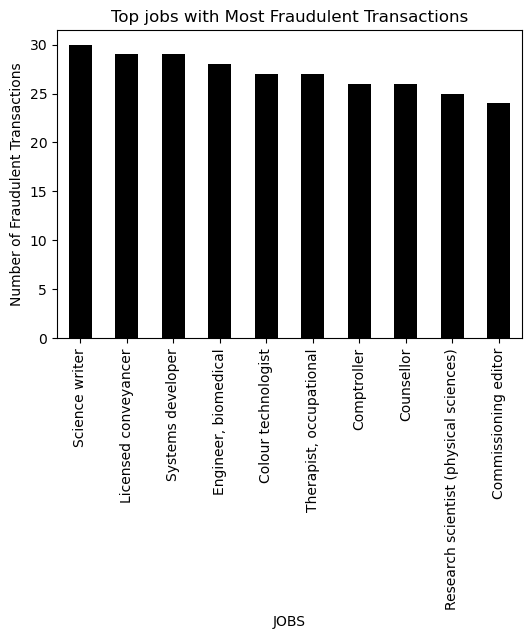

In [263]:
fraud_counts_job = data.groupby("job")["is_fraud"].sum()
top10_job = fraud_counts_job.nlargest(10)

plt.figure(figsize=(6,4))
top10_job.plot(kind="bar",color='black')
plt.xlabel("JOBS")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top jobs with Most Fraudulent Transactions")
plt.xticks(rotation=90)
plt.show()

## Transaction and age 

#### Categorizing Customers into Different Age Groups 

##### First changing date and time columns

In [284]:

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'],format='%Y-%m-%d %H:%M:%S') # converting the trans_date_trans_time Column to Datetime Format

data['hour'] = data['trans_date_trans_time'].dt.hour   # extracting the hour from the trans_date_trans_time column

data['day'] = data['trans_date_trans_time'].dt.day_name() # extracting the day Name from the trans_date_trans_time column

data['month'] = data['trans_date_trans_time'].dt.month # extracting the month from the trans_date_trans_time oclumn


data['dob'] = pd.to_datetime(data['dob'],format='%Y-%m-%d')
data['age_cust'] = (data['trans_date_trans_time'].dt.year - data['dob'].dt.year).astype(int)
data.drop(columns='dob',inplace=True)

age_ranges = {   # dictionary defining age ranges corresponding to different age groups
    "Child": (0, 13),
    "Teen": (13, 20),
    "Adult": (20, 65),
    "Senior": (65, None)}

data["age_group"] = np.where(data["age_cust"] < 13, "Child",np.where(data["age_cust"] < 20, "Teen",
                                            np.where(data["age_cust"] < 55, "Adult", "Senior")))
data["age_group"] = pd.cut(data["age_cust"], bins=[0, 13, 20, 55, 90], labels=["Child", "Teen", "Adult", "Senior"], 
                         include_lowest=True)


#### Fradulent Transaction on the Basis of Age 

C:\Users\PMLS\AppData\Local\Temp\ipykernel_4932\2945471846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts_age = data.groupby("age_group")["is_fraud"].sum()


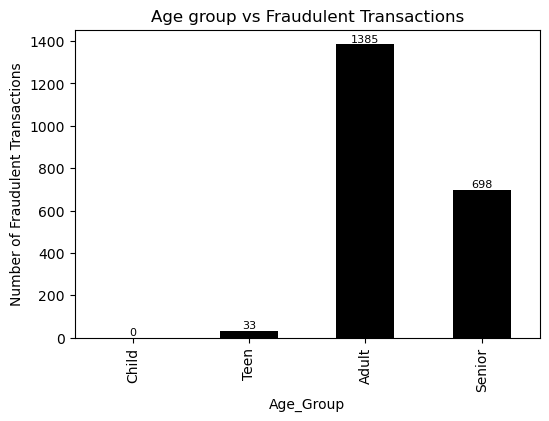

In [288]:
fraud_counts_age = data.groupby("age_group")["is_fraud"].sum()
plt.figure(figsize=(6,4))
ax = fraud_counts_age.plot(kind="bar",color="black")
plt.xlabel("Age_Group")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Age group vs Fraudulent Transactions")
plt.xticks(rotation=90)

# Annotate each bar with its count
for i, v in enumerate(fraud_counts_age):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.show()

#### Distribution of customer ages for fraud &  non-fraud transactions 

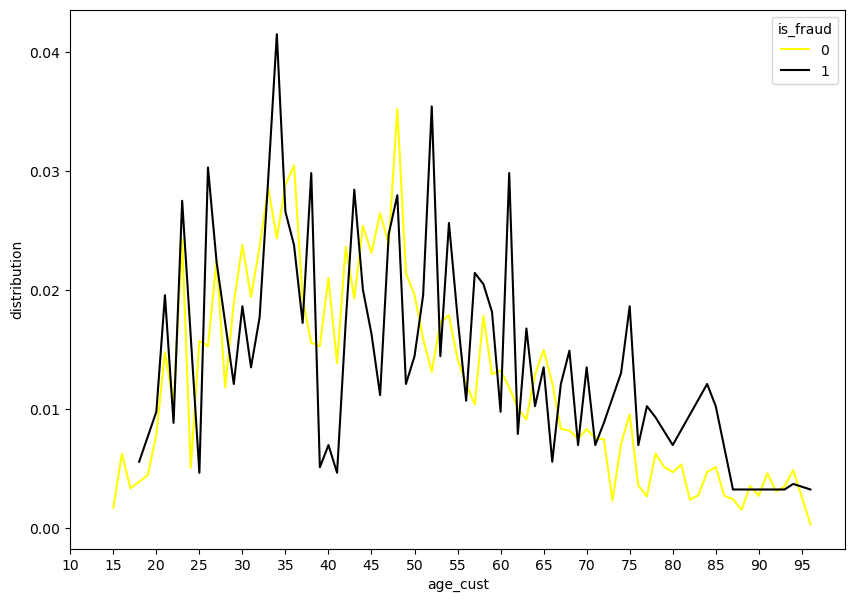

In [309]:
plt.figure(figsize = [10,7])
palette = {0: 'yellow', 1: 'black'}

trans_hour_distribution = data.groupby('is_fraud')['age_cust'].value_counts(normalize = True).rename('distribution').reset_index() # counting by customer age

sns.lineplot(data = trans_hour_distribution, x = 'age_cust', y = 'distribution', hue = 'is_fraud',palette=palette) # plotting the line plot with hue = class

plt.xticks(np.arange(10,100,5)); # modifying the xticks


### Transaction and Time 

-  number of fraudulent and non-fraudulent transactions by hour and gender  

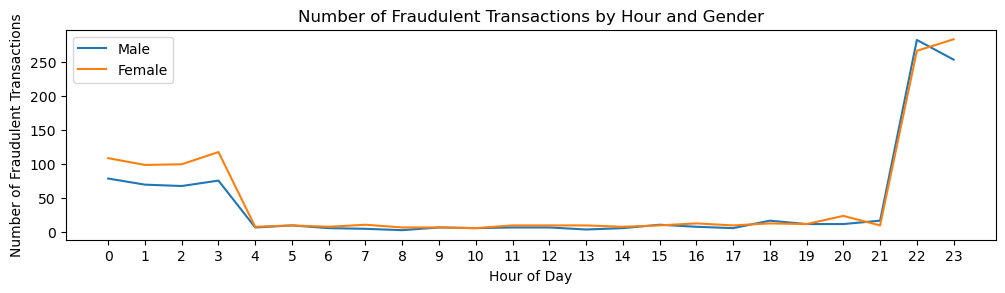

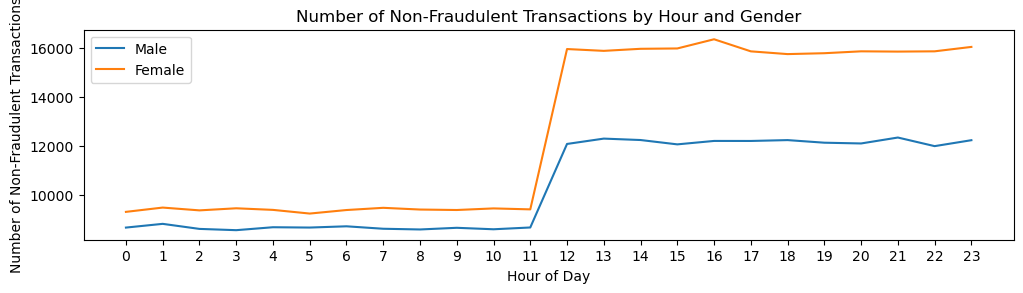

In [111]:

hourly_fraud_male = fraud[fraud['gender'] == 'M'].groupby('hour').size()
hourly_fraud_female = fraud[fraud['gender'] == 'F'].groupby('hour').size()

plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(hourly_fraud_male.index, hourly_fraud_male.values, label='Male')
plt.plot(hourly_fraud_female.index, hourly_fraud_female.values, label='Female')

plt.title('Number of Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(0, 24))  # because we have a 24 hr format
plt.legend()
plt.show()

hourly_non_fraud_male = normal[normal['gender'] == 'M'].groupby('hour').size()
hourly_non_fraud_female = normal[normal['gender'] == 'F'].groupby('hour').size()

plt.figure(figsize=(12, 6))
plt.subplot(2,1,2)
plt.plot(hourly_non_fraud_male.index, hourly_non_fraud_male.values, label='Male')
plt.plot(hourly_non_fraud_female.index, hourly_non_fraud_female.values, label='Female')

plt.title('Number of Non-Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.xticks(range(0, 24))  #because we have a 24 hour format
plt.legend()

plt.show()


- Fraud transactions by month 

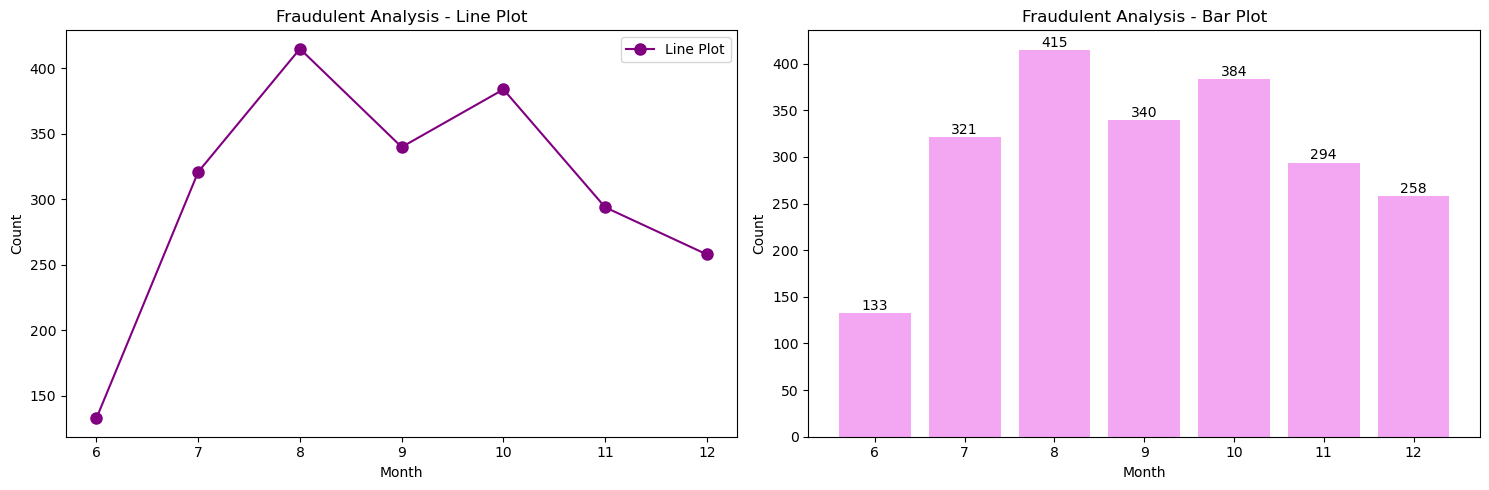

In [311]:
import matplotlib.pyplot as plt

# selecting data for fraud transactions as fraud = 1
fraudulent_data = data[data['is_fraud'] == 1]

# counting fraud occurrences by month and sorting by index
fraud_counts_by_month = fraudulent_data['month'].value_counts().sort_index()

plt.figure(figsize=(15, 5))

# plotting the line plot with markers in the first subplot
plt.subplot(1, 2, 1)
plt.plot(fraud_counts_by_month.index, fraud_counts_by_month, marker='o', linestyle='-', markersize=8, color='purple', label='Line Plot')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Fraudulent Analysis - Line Plot')
plt.legend()

# plotting the bar plot in the second subplot
plt.subplot(1, 2, 2)
bars = plt.bar(fraud_counts_by_month.index, fraud_counts_by_month, color='violet', alpha=0.7, label='Bar Plot')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Fraudulent Analysis - Bar Plot')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()



- Fraud transactions by hour 

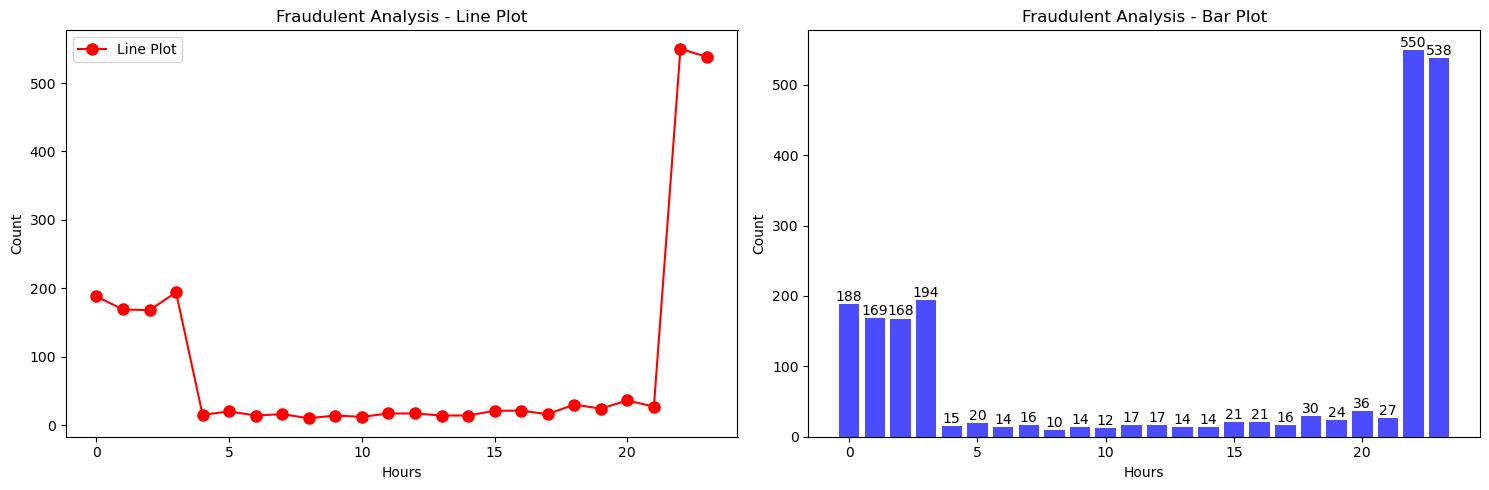

In [313]:
import matplotlib.pyplot as plt

# selecting data for fraud transactions as fraud = 1
fraudulent_data = data[data['is_fraud'] == 1]

# counting fraud occurrences by hours and sorting by index
fraud_counts_by_hours = fraudulent_data['hour'].value_counts().sort_index()

plt.figure(figsize=(15, 5))

# plotting the line plot with markers in the first subplot
plt.subplot(1, 2, 1)
plt.plot(fraud_counts_by_hours.index, fraud_counts_by_hours, marker='o', linestyle='-', markersize=8, color='red', label='Line Plot')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Fraudulent Analysis - Line Plot')
plt.legend()

# plotting the bar plot with annotations in the second subplot
plt.subplot(1, 2, 2)
bars = plt.bar(fraud_counts_by_hours.index, fraud_counts_by_hours, color='blue', alpha=0.7, label='Bar Plot')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Fraudulent Analysis - Bar Plot')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()



- Fraud transactions by days of week 

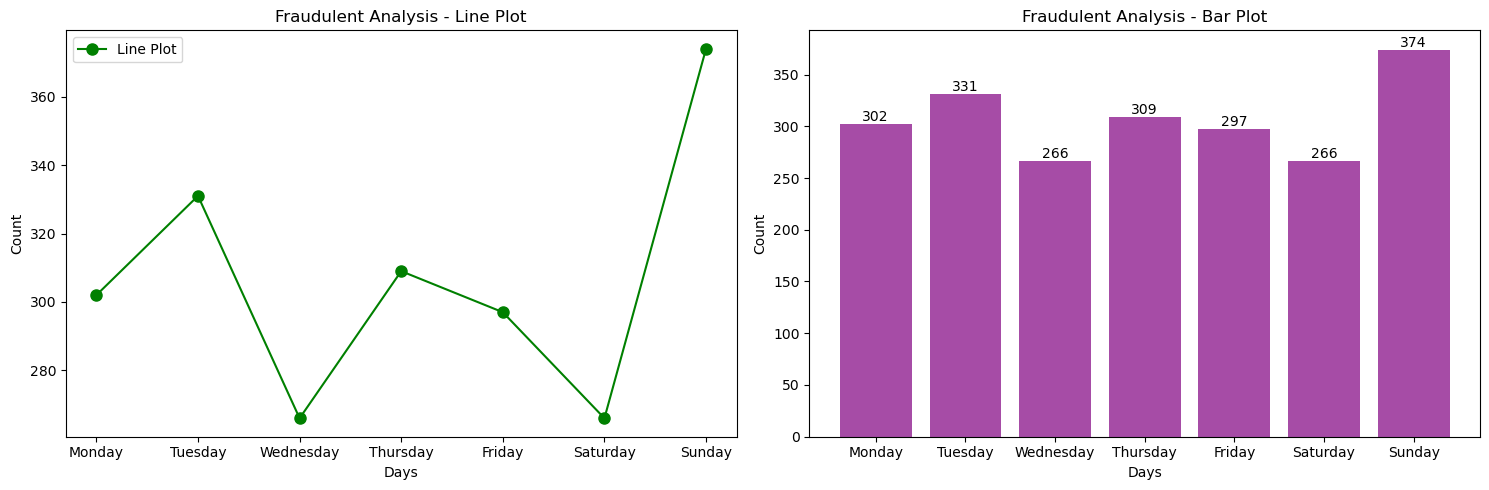

In [315]:
import matplotlib.pyplot as plt

# selecting data for fraud transactions as fraud = 1
fraudulent_data = data[data['is_fraud'] == 1]

# counting fraud occurrences by days and sorting by index (Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraud_counts_by_days = fraudulent_data['day'].value_counts().reindex(days_order)

plt.figure(figsize=(15, 5))

# plotting the line plot with markers in the first subplot
plt.subplot(1, 2, 1)
plt.plot(fraud_counts_by_days.index, fraud_counts_by_days, marker='o', linestyle='-', markersize=8, color='green', label='Line Plot')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Fraudulent Analysis - Line Plot')
plt.legend()

# plotting the bar plot with annotations in the second subplot
plt.subplot(1, 2, 2)
bars = plt.bar(fraud_counts_by_days.index, fraud_counts_by_days, color='purple', alpha=0.7, label='Bar Plot')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Fraudulent Analysis - Bar Plot')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()



## Feature Engineering 

In [130]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])
data['job'] = label_encoder.fit_transform(data['job'])

In [132]:
data["gender"] = data["gender"].replace({"M": 1, "F": 0})

C:\Users\PMLS\AppData\Local\Temp\ipykernel_4932\3252319574.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["gender"] = data["gender"].replace({"M": 1, "F": 0})


In [134]:
data.drop(columns=['trans_date_trans_time','cc_num','merchant','city','state', 'lat_dist', 'long_dist'],inplace=True)
data.drop(columns=['zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'day', 'month', 'age_group'],inplace=True)


In [136]:
data.head()

,category,amt,gender,job,is_fraud,hour,age_cust
0,10,2.86,1,275,0,12,52
1,10,29.84,0,392,0,12,30
2,5,41.28,0,259,0,12,50
3,9,60.05,1,407,0,12,33
4,13,3.19,1,196,0,12,65


## Model Implementation 

### Balancing Data Through Smote:
From the pie viusalizations, it was clear that the dataset is highly imbalanced in terms of targeted varaible, sinceit had 99.6% of non fraud transactions and 0.4 of fraud. Therefore, we have to balance out dataset so our model learn equal characteristics of both transactions

In [194]:
from sklearn.preprocessing import StandardScaler
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']




### Dataset into Training and Testing Sets 

In [197]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Logistic Regression  



In [201]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)


## Performance Matrix

#### On Training set 

In [336]:

y_train_pred = log_reg.predict(X_train_smote)
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
train_mae = mean_absolute_error(y_train_smote, y_train_pred)
train_mse = mean_squared_error(y_train_smote, y_train_pred)
train_rmse = np.sqrt(train_mse)

print(f'Training Accuracy: {train_accuracy}')
print(f'Training MAE: {train_mae}')
print(f'Training MSE: {train_mse}')
print(f'Training RMSE: {train_rmse}')
print(f'Training Accuracy: {train_accuracy}')


Training Accuracy: 0.8422314437751937
Training MAE: 0.15776855622480632
Training MSE: 0.15776855622480632
Training RMSE: 0.3972009015911297
Training Accuracy: 0.8422314437751937


#### On Testing Set

In [342]:
y_test_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print(f'Test Accuracy: {train_accuracy}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test RMSE: {test_rmse}')

Test Accuracy: 0.8422314437751937
Test MAE: 0.08563065332661532
Test MSE: 0.08563065332661532
Test RMSE: 0.2926271575343193


### Actual vs Predicted

In [329]:
y_pred = log_reg.predict(X_test)

# Print actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

        Actual  Predicted
119106       0          0
179292       0          0
540729       0          0
374360       0          0
314574       0          0
...        ...        ...
317052       0          0
197494       0          0
267684       0          0
266730       0          0
222139       0          1

[166716 rows x 2 columns]


### Confusion Matrix 

Confusion Matrix:
[[151955  14121]
 [   155    485]]


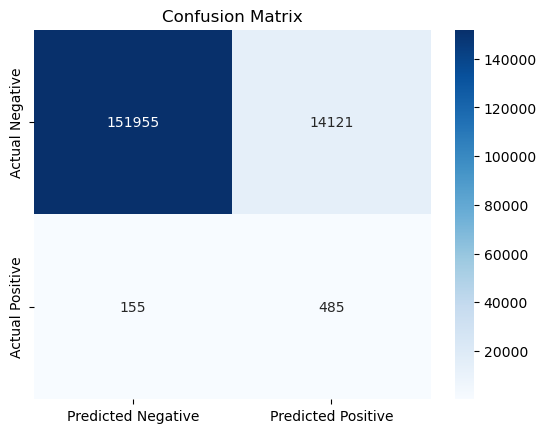

In [334]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm) 

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",  # heat map visualizations
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()


### Decision Boundary Of Logistic Regression
- The boundary line divides the feature space into two regions: one where the model predicts transactions as non-fraudulent and the other as fraudulent.
Points on one side of the boundary are predicted as non-fraudulent (e.g., shaded in one color), while points on the other side are predicted as fraudulent (shaded in another color).


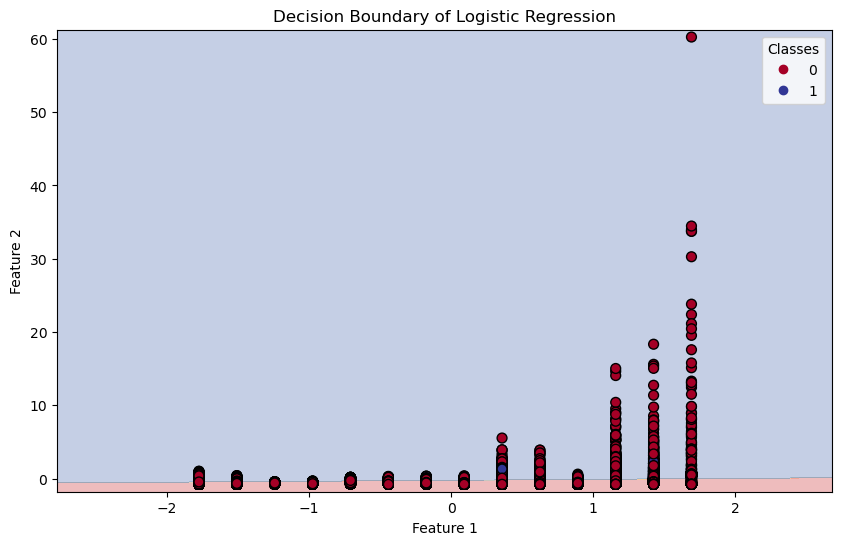

In [348]:

X_train_smote_2d = X_train_smote[:, :2] # assuming ywe have our features in X and target in y
X_test_2d = X_test[:, :2] # for visualization purposes,  selecting two features

log_reg_2d = LogisticRegression(random_state=42) # fit the logistic regression model
log_reg_2d.fit(X_train_smote_2d, y_train_smote)

x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1 # create a mesh grid for plotting decision boundaries
y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = log_reg_2d.predict(np.c_[xx.ravel(), yy.ravel()]) # predict class labels for the mesh grid
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6)) # plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.RdYlBu) # scatter plot of the test set
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Logistic Regression')

legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


- Red = Non fradulent trasanctions 
- Blue - Fradulent  Transaction 

- from the above, it is clear that most of the red dots folows the red dots and donot overlap with th eblue ones, justifying why the accuracy is so high, beacuse the model is working way fine.

# Overview of Project

In this project, we have done
- Loading Dataset
-  Cleaning Dataset
-  EDA (Expolatory Data Analysis)
-  Feature Engineering
-  Model Prediction
-  Model Evaluation (Using Machine Learning)

- Accuracy: The training accuracy of 84.22% is reasonably high, suggesting that the model is learning well from the training data.
- MAE, MSE, RMSE: These error metrics are relatively low, indicating that the model's predictions are close to the actual values.

- Both training and test accuracy are approximately 84.22%, indicating that the model performs consistently on both the training and test sets. This suggests that the model is not overfitting and generalizes well to new data.